In [132]:
# Import modules and packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from datetime import datetime

from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, TensorBoard

%matplotlib inline

In [133]:
dataset_train = pd.read_csv('C:/Users/Megaport/JNotebooks/data/pump_data.csv', sep=';', low_memory=False , decimal=',')

In [134]:
dataset_train.head()

,Unnamed: 0,Date,03:I3SROE,03:T3362,03:PI3061A,03:PI3061B,03:PI3061C,03:PD3066,03:T3492,03:T3358,...,03:E3851,03:T3632,03:T3633,03:T3634,03:FC3195,03:FV3195,03:FC3197,03:FV3197,03:FC3199,03:FV3199
0,0,01.01.19 00:00,"890,187","77,923","3,025","3,043","3,055",No Data,"40,456","97,602",...,"0,156","16,62","16,661","13,997","358,322",100,"362,52",100,"392,51",100
1,1,01.01.19 00:10,"890,262","77,893","3,024","3,043","3,053",No Data,"40,415","97,178",...,"0,157","16,675","16,676","13,985","358,897",100,"362,505",100,"393,009",100
2,2,01.01.19 00:20,"890,337","77,863","3,024","3,043","3,051",No Data,"40,375","97,215",...,"0,158","16,711","16,726","14,02","358,984",100,"362,305",100,"392,767",100
3,3,01.01.19 00:30,"890,294","77,833","3,023","3,043","3,051",No Data,"40,41","97,602",...,"0,159","16,716","16,784","14,035","362,205",100,"361,171",100,"391,512",100
4,4,01.01.19 00:40,"890,239","77,823","3,023","3,043","3,052",No Data,"40,41","97,438",...,"0,16","16,75","16,815","14,065","361,954",100,"360,852",100,"390,736",100


In [135]:
dataset_train = dataset_train.replace(to_replace='N_LAUF', value='0')
dataset_train = dataset_train.replace(to_replace='LAUF', value='1')
dataset_train = dataset_train.replace(to_replace='No Data', value='-1001')
dataset_train = dataset_train.replace(to_replace='Over Range', value='-1002')
dataset_train = dataset_train.replace(to_replace='I/O Timeout', value='-1003')
dataset_train = dataset_train.replace(to_replace='Calc Failed', value='-1004')
dataset_train = dataset_train.replace(to_replace='Error', value='-1005')
dataset_train = dataset_train.replace(to_replace='Configure', value='-1006')
dataset_train = dataset_train.replace(to_replace='Scan Off', value='-1007')
dataset_train = dataset_train.replace(to_replace='Comm Fail', value='-1008')
dataset_train = dataset_train.replace(to_replace='Shutdown', value='-1009')
dataset_train = dataset_train.replace(to_replace='NaN', value='-1010')
dataset_train = dataset_train.replace(to_replace='Bad Input', value='-1011')
dataset_train = dataset_train.replace(to_replace='Bad', value='-1012')

In [136]:
dataset_train = dataset_train.drop(['Unnamed: 0'], axis = 1)
dataset_train = dataset_train.drop(['03:FV3195'], axis = 1)
dataset_train = dataset_train.drop(['03:FV3197'], axis = 1)
dataset_train = dataset_train.drop(['03:FV3199'], axis = 1)

In [137]:
dataset_train = dataset_train[1:].replace(',','.', regex=True)

In [138]:
dataset_train.dtypes

Date            object
03:I3SROE       object
03:T3362        object
03:PI3061A      object
03:PI3061B      object
03:PI3061C      object
03:PD3066       object
03:T3492        object
03:T3358        object
03:TC3550       object
03:TC3550A      object
03:FV3762       object
03:FC3762       object
03:TC3730       object
03:TV3730A      object
03:TV3730B      object
03:TV3730C      object
03:T3731        object
03:P3649        object
03:P3065        object
03:LC3661       object
03:LI3661A      object
03:LI3661B      object
03:LI3661C      object
03:YV4978       object
03:FC3075.OP    object
03:FC3075       object
03:T3361        object
03:T3359        object
03:T3360        object
03:N3722_1      object
03:N3721_1      object
03:N3725_1      object
03:E3849        object
03:T3626        object
03:T3627        object
03:T3628        object
03:N3726_1      object
03:E3850        object
03:T3629        object
03:T3630        object
03:T3631        object
03:N3723_1      object
03:N3727_1 

In [139]:
for column in dataset_train[1:]:
    dataset_train[column] = pd.to_numeric(dataset_train[column], errors='coerce')

In [140]:
dataset_train.dtypes

Date            float64
03:I3SROE       float64
03:T3362        float64
03:PI3061A      float64
03:PI3061B      float64
03:PI3061C      float64
03:PD3066       float64
03:T3492        float64
03:T3358        float64
03:TC3550       float64
03:TC3550A      float64
03:FV3762       float64
03:FC3762       float64
03:TC3730       float64
03:TV3730A      float64
03:TV3730B      float64
03:TV3730C      float64
03:T3731        float64
03:P3649        float64
03:P3065        float64
03:LC3661       float64
03:LI3661A      float64
03:LI3661B      float64
03:LI3661C      float64
03:YV4978       float64
03:FC3075.OP    float64
03:FC3075       float64
03:T3361        float64
03:T3359        float64
03:T3360        float64
03:N3722_1      float64
03:N3721_1      float64
03:N3725_1      float64
03:E3849        float64
03:T3626        float64
03:T3627        float64
03:T3628        float64
03:N3726_1      float64
03:E3850        float64
03:T3629        float64
03:T3630        float64
03:T3631        

In [141]:
dataset_train['Durchsatz'] = dataset_train['03:FC3195'] + dataset_train['03:FC3197'] + dataset_train['03:FC3199']
dataset_train['Durchsatz']

1         1114.411
2         1114.056
3         1114.888
4         1113.542
5         1113.840
            ...   
574000     932.979
574001     933.390
574002     933.553
574003     932.625
574004     944.560
Name: Durchsatz, Length: 574004, dtype: float64

In [142]:
# Select features (columns) to be involved intro training and predictions
cols = list(dataset_train)[1:]

cols

['03:I3SROE',
 '03:T3362',
 '03:PI3061A',
 '03:PI3061B',
 '03:PI3061C',
 '03:PD3066',
 '03:T3492',
 '03:T3358',
 '03:TC3550',
 '03:TC3550A',
 '03:FV3762',
 '03:FC3762',
 '03:TC3730',
 '03:TV3730A',
 '03:TV3730B',
 '03:TV3730C',
 '03:T3731',
 '03:P3649',
 '03:P3065',
 '03:LC3661',
 '03:LI3661A',
 '03:LI3661B',
 '03:LI3661C',
 '03:YV4978',
 '03:FC3075.OP',
 '03:FC3075',
 '03:T3361',
 '03:T3359',
 '03:T3360',
 '03:N3722_1',
 '03:N3721_1',
 '03:N3725_1',
 '03:E3849',
 '03:T3626',
 '03:T3627',
 '03:T3628',
 '03:N3726_1',
 '03:E3850',
 '03:T3629',
 '03:T3630',
 '03:T3631',
 '03:N3723_1',
 '03:N3727_1',
 '03:E3851',
 '03:T3632',
 '03:T3633',
 '03:T3634',
 '03:FC3195',
 '03:FC3197',
 '03:FC3199',
 'Durchsatz']

In [143]:
dataset_train = dataset_train[cols].fillna(0)

In [144]:
dataset_train.isna().any()

03:I3SROE       False
03:T3362        False
03:PI3061A      False
03:PI3061B      False
03:PI3061C      False
03:PD3066       False
03:T3492        False
03:T3358        False
03:TC3550       False
03:TC3550A      False
03:FV3762       False
03:FC3762       False
03:TC3730       False
03:TV3730A      False
03:TV3730B      False
03:TV3730C      False
03:T3731        False
03:P3649        False
03:P3065        False
03:LC3661       False
03:LI3661A      False
03:LI3661B      False
03:LI3661C      False
03:YV4978       False
03:FC3075.OP    False
03:FC3075       False
03:T3361        False
03:T3359        False
03:T3360        False
03:N3722_1      False
03:N3721_1      False
03:N3725_1      False
03:E3849        False
03:T3626        False
03:T3627        False
03:T3628        False
03:N3726_1      False
03:E3850        False
03:T3629        False
03:T3630        False
03:T3631        False
03:N3723_1      False
03:N3727_1      False
03:E3851        False
03:T3632        False
03:T3633  

In [145]:
dataset_train.isnull().any()

03:I3SROE       False
03:T3362        False
03:PI3061A      False
03:PI3061B      False
03:PI3061C      False
03:PD3066       False
03:T3492        False
03:T3358        False
03:TC3550       False
03:TC3550A      False
03:FV3762       False
03:FC3762       False
03:TC3730       False
03:TV3730A      False
03:TV3730B      False
03:TV3730C      False
03:T3731        False
03:P3649        False
03:P3065        False
03:LC3661       False
03:LI3661A      False
03:LI3661B      False
03:LI3661C      False
03:YV4978       False
03:FC3075.OP    False
03:FC3075       False
03:T3361        False
03:T3359        False
03:T3360        False
03:N3722_1      False
03:N3721_1      False
03:N3725_1      False
03:E3849        False
03:T3626        False
03:T3627        False
03:T3628        False
03:N3726_1      False
03:E3850        False
03:T3629        False
03:T3630        False
03:T3631        False
03:N3723_1      False
03:N3727_1      False
03:E3851        False
03:T3632        False
03:T3633  

In [146]:
dataset_train.head()

,03:I3SROE,03:T3362,03:PI3061A,03:PI3061B,03:PI3061C,03:PD3066,03:T3492,03:T3358,03:TC3550,03:TC3550A,...,03:N3723_1,03:N3727_1,03:E3851,03:T3632,03:T3633,03:T3634,03:FC3195,03:FC3197,03:FC3199,Durchsatz
1,890.262,77.893,3.024,3.043,3.053,-1001.0,40.415,97.178,120.120,0.0,...,0.0,1.0,0.157,16.675,16.676,13.985,358.897,362.505,393.009,1114.411
2,890.337,77.863,3.024,3.043,3.051,-1001.0,40.375,97.215,120.027,0.0,...,0.0,1.0,0.158,16.711,16.726,14.020,358.984,362.305,392.767,1114.056
3,890.294,77.833,3.023,3.043,3.051,-1001.0,40.410,97.602,120.114,0.0,...,0.0,1.0,0.159,16.716,16.784,14.035,362.205,361.171,391.512,1114.888
4,890.239,77.823,3.023,3.043,3.052,-1001.0,40.410,97.438,120.135,0.0,...,0.0,1.0,0.160,16.750,16.815,14.065,361.954,360.852,390.736,1113.542
5,890.185,77.867,3.022,3.046,3.053,-1001.0,40.410,97.196,120.142,0.0,...,0.0,1.0,0.161,16.779,16.820,14.086,361.936,360.707,391.197,1113.840


In [147]:
dataset_train.dtypes

03:I3SROE       float64
03:T3362        float64
03:PI3061A      float64
03:PI3061B      float64
03:PI3061C      float64
03:PD3066       float64
03:T3492        float64
03:T3358        float64
03:TC3550       float64
03:TC3550A      float64
03:FV3762       float64
03:FC3762       float64
03:TC3730       float64
03:TV3730A      float64
03:TV3730B      float64
03:TV3730C      float64
03:T3731        float64
03:P3649        float64
03:P3065        float64
03:LC3661       float64
03:LI3661A      float64
03:LI3661B      float64
03:LI3661C      float64
03:YV4978       float64
03:FC3075.OP    float64
03:FC3075       float64
03:T3361        float64
03:T3359        float64
03:T3360        float64
03:N3722_1      float64
03:N3721_1      float64
03:N3725_1      float64
03:E3849        float64
03:T3626        float64
03:T3627        float64
03:T3628        float64
03:N3726_1      float64
03:E3850        float64
03:T3629        float64
03:T3630        float64
03:T3631        float64
03:N3723_1      

In [148]:
training_set = dataset_train[cols].values

In [149]:
training_set

array([[ 890.262,   77.893,    3.024, ...,  362.505,  393.009, 1114.411],
       [ 890.337,   77.863,    3.024, ...,  362.305,  392.767, 1114.056],
       [ 890.294,   77.833,    3.023, ...,  361.171,  391.512, 1114.888],
       ...,
       [ 750.08 ,   73.618,    2.696, ...,  300.264,  333.121,  933.553],
       [ 751.267,   73.667,    2.699, ...,  299.913,  332.373,  932.625],
       [ 755.64 ,   73.563,    2.701, ...,  305.107,  338.502,  944.56 ]])

In [150]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
training_set_scaled = sc.fit_transform(training_set)

In [151]:
training_set_scaled

array([[ 0.15047097,  0.03244339,  0.08155981, ...,  0.24316548,
         0.23261023,  0.17726205],
       [ 0.15093557,  0.03112083,  0.08155981, ...,  0.2397793 ,
         0.23038793,  0.17605772],
       [ 0.1506692 ,  0.02979827,  0.08154706, ...,  0.22057963,
         0.21886317,  0.17888027],
       ...,
       [-0.71791072, -0.15602151,  0.07737741, ..., -0.81063205,
        -0.31734565, -0.43629801],
       [-0.71055764, -0.15386133,  0.07741566, ..., -0.8165748 ,
        -0.32421459, -0.43944625],
       [-0.68346833, -0.1584462 ,  0.07744116, ..., -0.72863559,
        -0.26793153, -0.39895681]])

In [152]:
trainX = training_set_scaled[:,1:50]
trainX

array([[ 0.03244339,  0.08155981,  0.08168094, ...,  0.08280322,
         0.24316548,  0.23261023],
       [ 0.03112083,  0.08155981,  0.08168094, ...,  0.08337684,
         0.2397793 ,  0.23038793],
       [ 0.02979827,  0.08154706,  0.08168094, ...,  0.10461387,
         0.22057963,  0.21886317],
       ...,
       [-0.15602151,  0.07737741,  0.07726906, ..., -0.30441503,
        -0.81063205, -0.31734565],
       [-0.15386133,  0.07741566,  0.07728181, ..., -0.30328757,
        -0.8165748 , -0.32421459],
       [-0.1584462 ,  0.07744116,  0.07729456, ..., -0.29925247,
        -0.72863559, -0.26793153]])

In [153]:
trainY = training_set_scaled[:,50:51]
trainY

array([[ 0.17726205],
       [ 0.17605772],
       [ 0.17888027],
       ...,
       [-0.43629801],
       [-0.43944625],
       [-0.39895681]])

In [154]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(trainX, trainY, test_size=0.33, random_state=42)

In [155]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
y_train = np.reshape(y_train, (y_train.shape[0], 1, y_train.shape[1]))
#y_test = np.reshape(y_test, (y_test.shape[0], 1, y_test.shape[1]))

In [156]:
X_train.shape

(384582, 1, 49)

In [157]:
#X_train = X_train.reshape(1,384582, 49)
#y_train = y_train.reshape(1, 384582, 1)
#X_test = X_test.reshape(1,189422, 49)
#y_test = y_test.reshape(1, 189422, 1)

In [158]:
import tensorflow as tf

model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(50, input_shape=(1, 49)))
model.add(tf.keras.layers.Dense(1))
opt = tf.keras.optimizers.RMSprop(learning_rate=0.1)
model.compile(loss='mae', optimizer=opt)

In [159]:
X_train.shape

(384582, 1, 49)

In [160]:
X_test.shape

(189422, 1, 49)

In [161]:
y_train.shape

(384582, 1, 1)

In [162]:
y_test.shape

(189422, 1)

In [163]:
import matplotlib.pyplot as plt

Epoch 1/50
5342/5342 - 8s - loss: 0.1609 - val_loss: 0.1903
Epoch 2/50
5342/5342 - 7s - loss: 0.1370 - val_loss: 0.1364
Epoch 3/50
5342/5342 - 6s - loss: 0.1168 - val_loss: 0.1037
Epoch 4/50
5342/5342 - 6s - loss: 0.1139 - val_loss: 0.1197
Epoch 5/50
5342/5342 - 7s - loss: 0.1098 - val_loss: 0.1191
Epoch 6/50
5342/5342 - 7s - loss: 0.1110 - val_loss: 0.1358
Epoch 7/50
5342/5342 - 6s - loss: 0.1077 - val_loss: 0.1201
Epoch 8/50
5342/5342 - 6s - loss: 0.1057 - val_loss: 0.1194
Epoch 9/50
5342/5342 - 6s - loss: 0.1053 - val_loss: 0.0956
Epoch 10/50
5342/5342 - 6s - loss: 0.1039 - val_loss: 0.1102
Epoch 11/50
5342/5342 - 6s - loss: 0.1049 - val_loss: 0.1512
Epoch 12/50
5342/5342 - 6s - loss: 0.1042 - val_loss: 0.0912
Epoch 13/50
5342/5342 - 6s - loss: 0.1036 - val_loss: 0.0881
Epoch 14/50
5342/5342 - 6s - loss: 0.1035 - val_loss: 0.1179
Epoch 15/50
5342/5342 - 7s - loss: 0.1017 - val_loss: 0.1092
Epoch 16/50
5342/5342 - 7s - loss: 0.1021 - val_loss: 0.0920
Epoch 17/50
5342/5342 - 6s - loss

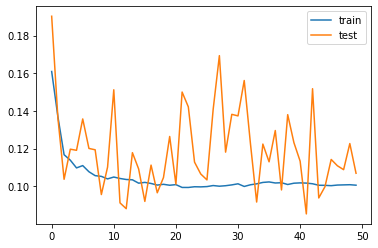

In [164]:
history = model.fit(X_train, y_train, epochs=50, batch_size=72, validation_data=(X_test, y_test), verbose=2, shuffle=False)
# plot history
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [165]:
yhat = model.predict(X_test, verbose=0)
print(yhat)

[[ 0.21461996]
 [ 0.21461996]
 [ 0.21461996]
 ...
 [ 0.21461996]
 [ 0.21461996]
 [-1.0427305 ]]


In [166]:
yhat.reshape(189422,1)

array([[ 0.21461996],
       [ 0.21461996],
       [ 0.21461996],
       ...,
       [ 0.21461996],
       [ 0.21461996],
       [-1.0427305 ]], dtype=float32)

In [167]:
y_test.reshape(189422,1)

array([[ 0.24494235],
       [ 0.27750692],
       [ 0.24859946],
       ...,
       [ 0.24660467],
       [ 0.28008861],
       [-0.76155358]])

In [168]:
yhat.shape

(189422, 1)

In [169]:
y_test.shape

(189422, 1)

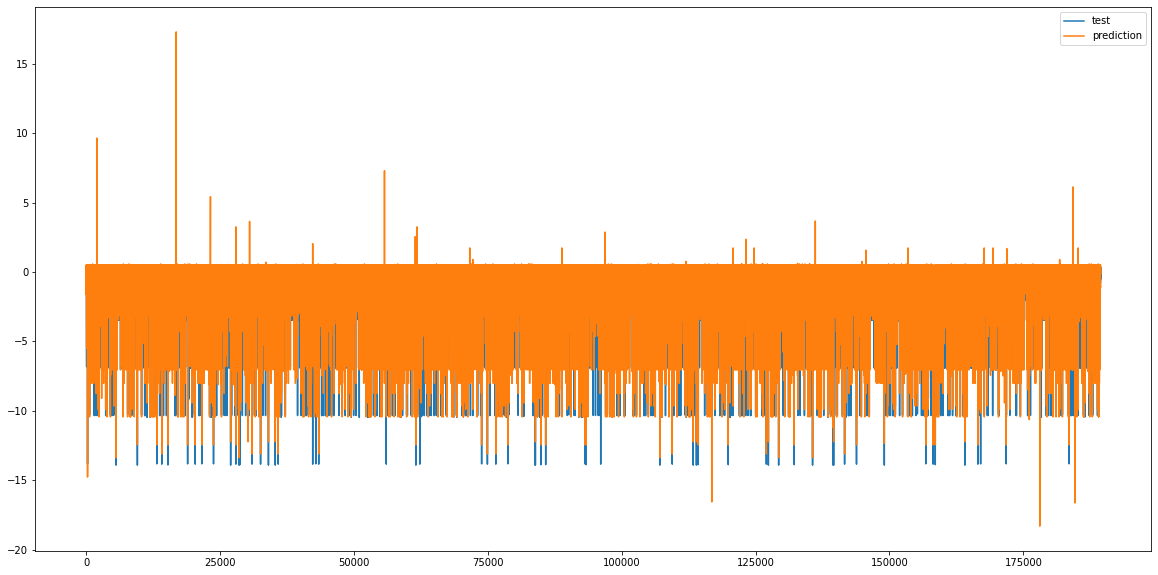

In [176]:
plt.figure(figsize=(20,10))
plt.plot(y_test, label='test')
plt.plot(yhat, label='prediction')
plt.legend()
plt.show()